In [334]:
import pandas as pd
import duckdb

df = pd.read_csv("../../data/salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,EX,FT,Head of Data,348516,USD,348516,US,0,US,M
1,2025,EX,FT,Head of Data,232344,USD,232344,US,0,US,M
2,2025,SE,FT,Data Scientist,145400,USD,145400,US,0,US,M
3,2025,SE,FT,Data Scientist,81600,USD,81600,US,0,US,M
4,2025,MI,FT,Engineer,160000,USD,160000,US,100,US,M


In [335]:
# a) Start with some simple EDA, check summary statistics, info, columns etc

df.info()
df.describe().T
df.shape, df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151445 entries, 0 to 151444
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           151445 non-null  int64 
 1   experience_level    151445 non-null  object
 2   employment_type     151445 non-null  object
 3   job_title           151445 non-null  object
 4   salary              151445 non-null  int64 
 5   salary_currency     151445 non-null  object
 6   salary_in_usd       151445 non-null  int64 
 7   employee_residence  151445 non-null  object
 8   remote_ratio        151445 non-null  int64 
 9   company_location    151445 non-null  object
 10  company_size        151445 non-null  object
dtypes: int64(4), object(7)
memory usage: 12.7+ MB


((151445, 11),
 Index(['work_year', 'experience_level', 'employment_type', 'job_title',
        'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
        'remote_ratio', 'company_location', 'company_size'],
       dtype='object'))

In [336]:
df_salaries = df.groupby("work_year")["salary_in_usd"].median()
df_salaries

work_year
2020     79833.0
2021     83872.0
2022    131300.0
2023    145000.0
2024    148945.0
2025    145100.0
Name: salary_in_usd, dtype: float64

<Axes: xlabel='work_year'>

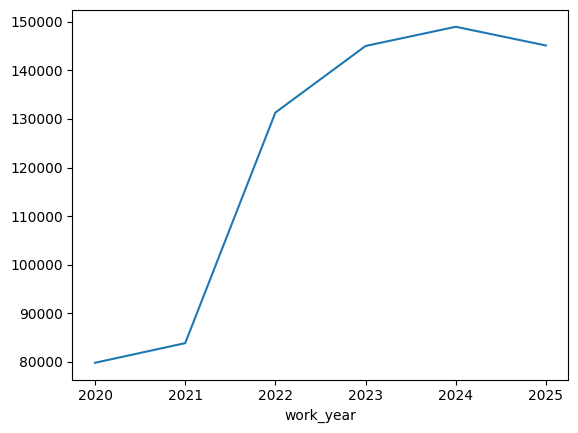

In [337]:
#   b) Plot the distribution of the salaries in USD. #Vill man räkna raderna istället? 
#(y="salary_in_usd", x="work_year") Behövs ej, för pandas förstår x och y pga i series som skapas från groupby, där index blir workyear (x)
# och salary (y) är värdet
df_salaries.plot() 

In [338]:
# df_salaries_sorted = df["salary_in_usd"].sort_values()
# df_salaries_sorted.plot(x="salary_in_usd")


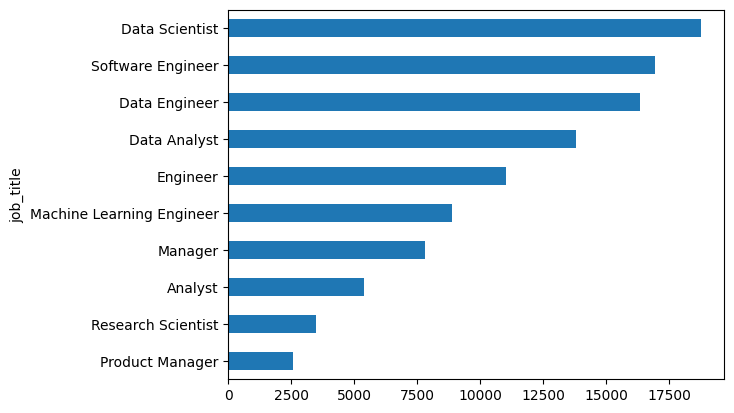

In [339]:

#   c) How many job postings are there for each job title? 
# Take the tenth most common job title and plot a bar chart of the number of job postings for that title.
df_job_titles = df["job_title"].value_counts().iloc[:10].plot(kind="barh").invert_yaxis() #inverta för att sorta åt andra hållet
df_job_titles

In [340]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [341]:

#   d) Create a dataframe that contains the following columns: job_title, experience_level, median_salary_usd, mean_salary_usd, mean_salary_sek. 
# Sort the dataframe by mean_salary_sek.            # Behövs median_usd, mean_usd och mean_SEK
df[["job_title", "experience_level"]] #, "median_salary_usd", "mean_salary_usd", "mean_salary_sek"]

df_avg_salary = duckdb.query(
    """
    SELECT 
    job_title, 
    experience_level,
    median(salary_in_usd) as median_salary_usd,
    mean(salary_in_usd) as mean_salary_usd,
    mean(salary_in_usd * 9.58) as mean_salary_sek,
    from df
    group by job_title, experience_level
    order by mean_salary_sek 
    """
).df()

df_avg_salary

,job_title,experience_level,median_salary_usd,mean_salary_usd,mean_salary_sek
0,Staff Data Analyst,EX,15000.0,15000.0,143700.00
1,Quantitative Risk Analyst,MI,18000.0,18000.0,172440.00
2,Data Analyst Lead,EN,18000.0,18000.0,172440.00
3,Stage,MI,19578.5,19578.5,187562.03
4,Alternance,EN,19825.0,19825.0,189923.50
...,...,...,...,...,...
932,Data Science Tech Lead,SE,375000.0,375000.0,3592500.00
933,Analytics Engineering Manager,SE,399880.0,399880.0,3830850.40
934,Principal Data Scientist,EX,416000.0,416000.0,3985280.00
935,Research Team Lead,SE,450000.0,450000.0,4311000.00


In [342]:

#   f) Create a column with salary in SEK per month and make the distribution of salaries in SEK per month for all job postings
df_avg_salary["monthly_salary_sek"] = df_avg_salary["mean_salary_sek"] / 12
df_avg_salary
# df_avg_salary.drop(columns="mothly_salary_sek", inplace=True)

,job_title,experience_level,median_salary_usd,mean_salary_usd,mean_salary_sek,monthly_salary_sek
0,Staff Data Analyst,EX,15000.0,15000.0,143700.00,11975.000000
1,Quantitative Risk Analyst,MI,18000.0,18000.0,172440.00,14370.000000
2,Data Analyst Lead,EN,18000.0,18000.0,172440.00,14370.000000
3,Stage,MI,19578.5,19578.5,187562.03,15630.169167
4,Alternance,EN,19825.0,19825.0,189923.50,15826.958333
...,...,...,...,...,...,...
932,Data Science Tech Lead,SE,375000.0,375000.0,3592500.00,299375.000000
933,Analytics Engineering Manager,SE,399880.0,399880.0,3830850.40,319237.533333
934,Principal Data Scientist,EX,416000.0,416000.0,3985280.00,332106.666667
935,Research Team Lead,SE,450000.0,450000.0,4311000.00,359250.000000


<Axes: ylabel='experience_level'>

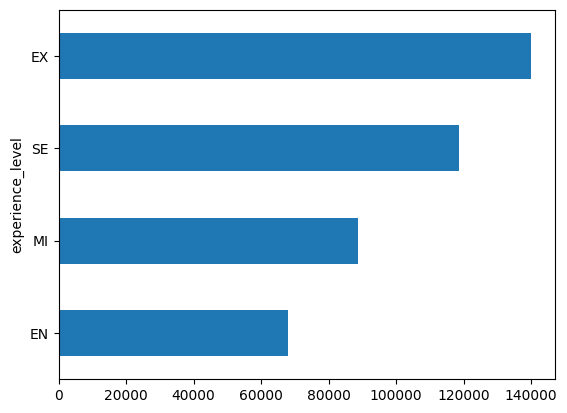

In [343]:

#   g) Now create distributions of monthly SEK based on different experience levels, do you see any trends?
df_avg_salary.groupby("experience_level")["monthly_salary_sek"].median().sort_values().plot(kind="barh")

<Axes: ylabel='job_title'>

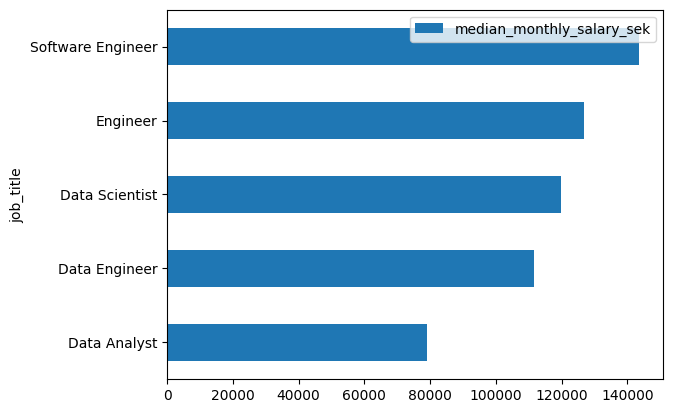

In [344]:
#   h) Find median monthly swedish salary for more common job_titles. Think what common may mean here.
# Data Scientist                      18751
# Software Engineer                   16948
# Data Engineer                       16352
# Data Analyst                        13779
# Engineer                            11004
# df.groupby("job_title")["job_title"].count().sort_values(ascending=False).head()

df_common_jobs = duckdb.query(
    """ 
    SELECT count(job_title) as total, job_title, median(salary_in_usd * 9.58) / 12 as median_monthly_salary_sek
    from df
    group by job_title
    order by total desc
    LIMIT 5
    """
).df()
df_common_jobs.sort_values(by="median_monthly_salary_sek").plot(x="job_title", y="median_monthly_salary_sek", kind="barh")
# df["job_title"].nunique() #422

In [348]:
df_country_codes = pd.read_csv("../../data/country_codes.csv")
# df_country_codes.reset_index(inplace=True)
# df_country_codes["CODE"] = df_country_codes["CODE"].str[:3].str[1:] #.drop(columns="Unnamed: 2",inplace=True)
df_country_codes

,code,country
0,AD,Andorra
1,AE,United Arab Emirates
2,AM,Armenia
3,AR,Argentina
4,AS,American Samoa
...,...,...
72,TR,Turkey (Türkiye)
73,UA,Ukraine
74,US,United States
75,VN,Vietnam


In [352]:

#i) Join the country_codes.csv to the dataset get the actual country names. 
# Find the median monthly salary in SEK for each country and the number of job postings.
df_joined = duckdb.query(
    """ 
    SELECT count(df.job_title) as number_of_jobs, 
    cc.country, 
    median(df.salary_in_usd * 9.58) / 12 as median_monthly_salary_sek 
    from 
    df
    inner join df_country_codes cc on df.company_location = cc.code
    group by country
    order by number_of_jobs desc
    Limit 10
    """
).df()
df_joined #.groupby("country")["median_monthly_salary_sek"].median()

,number_of_jobs,country,median_monthly_salary_sek
0,135569,United States,120708.000000
1,6208,Canada,95800.000000
2,4181,United Kingdom,60354.000000
3,595,Australia,93694.795000
4,482,Netherlands,57480.000000
5,455,Germany,70068.918333
6,437,France,45378.863333
7,372,Lithuania,43395.404167
8,355,Austria,40608.023333
9,307,Spain,38787.025000


In [367]:
df_joined["number_of_jobs"].value_counts()

number_of_jobs
1         10
12         5
4          5
6          4
3          4
7          3
27         2
10         2
17         2
2          2
9          2
595        1
135569     1
6208       1
4181       1
113        1
118        1
149        1
166        1
237        1
307        1
355        1
372        1
437        1
455        1
482        1
112        1
80         1
86         1
85         1
82         1
28         1
31         1
34         1
35         1
42         1
47         1
55         1
63         1
69         1
70         1
71         1
21         1
11         1
13         1
22         1
5          1
Name: count, dtype: int64